In [6]:
# Imports
from ape_paths import wav_path
import os
import librosa
import librosa.display
# import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from tensorflow.python.keras import utils
# from keras.utils import to_categorical

In [11]:
def plot_spectrogram(genre_path, genre):
    '''
    This function takes in a list of genres and plots a mel spectrogram for one song 
    per genre.
    '''
    for file in os.scandir(genre_path):
        if file.name.endswith('.wav'): 
            # Loading in the audio file
            
            y, sr = librosa.core.load(os.path.join(genre_path, file.name))
            
            # Computing the spectrogram and transforming it to the decibal scale
            spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
            spect = librosa.power_to_db(spect, ref=np.max) # Converting to decibels
            
            # Plotting the transformed spectrogram
            plt.figure(figsize=(10,7))
            librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
            plt.title(str(genre))
            # plt.show()
            plt.savefig(os.path.join('..', 'Graphs', f'{genre}.pdf'))
            break

/usr/local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/usr/local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; supp

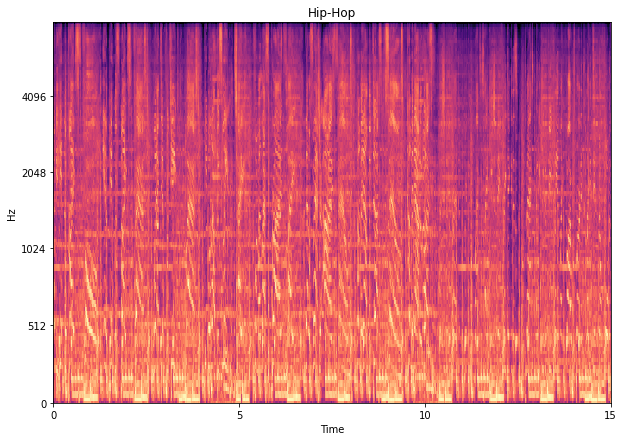

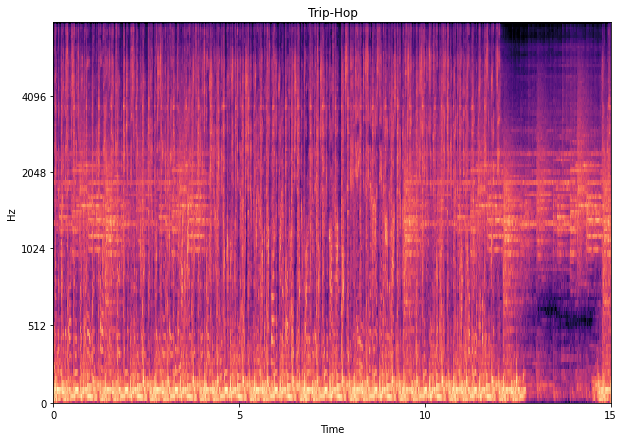

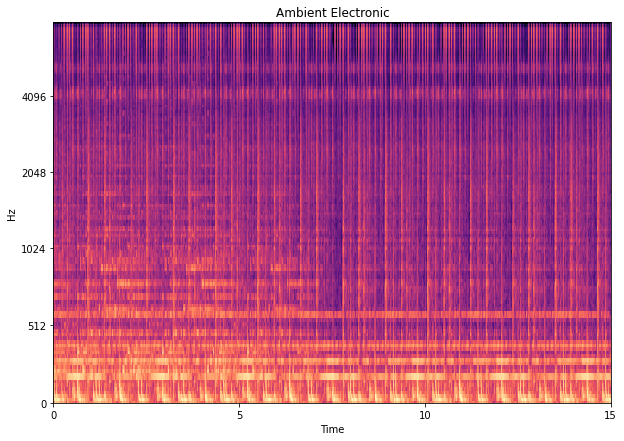

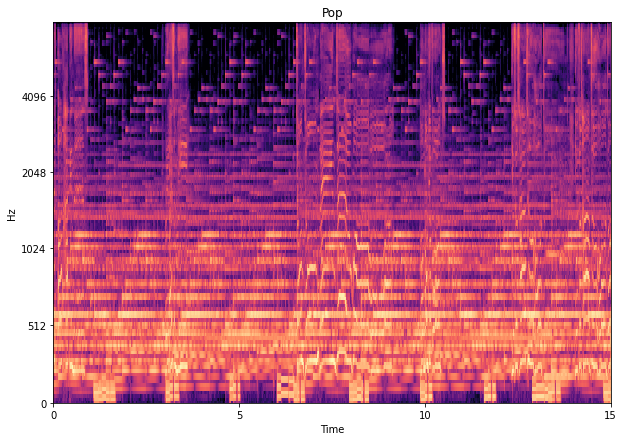

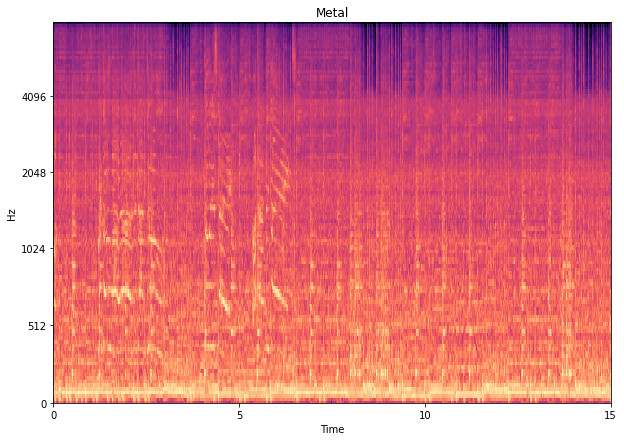

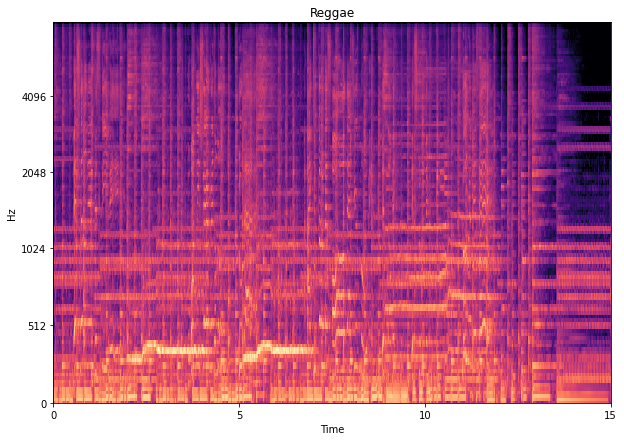

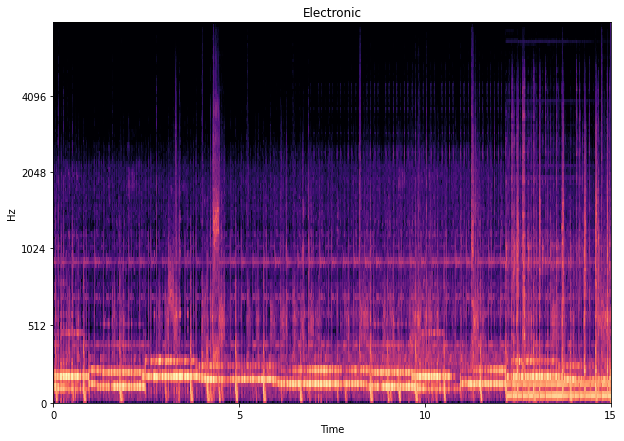

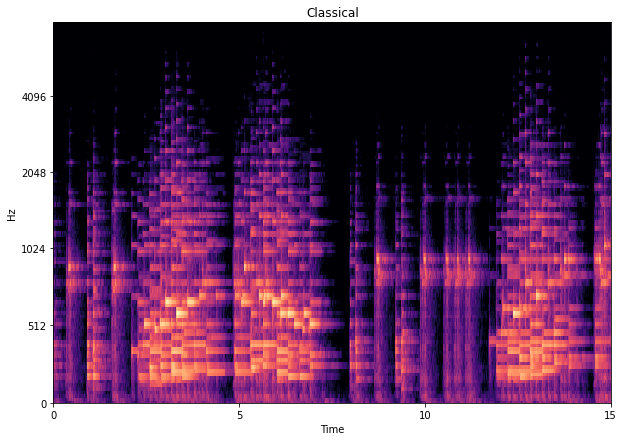

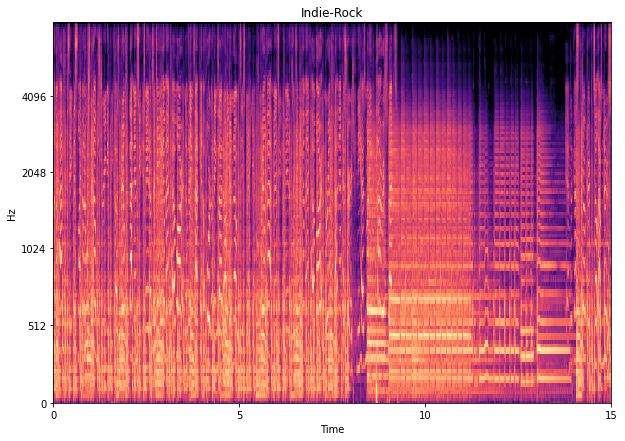

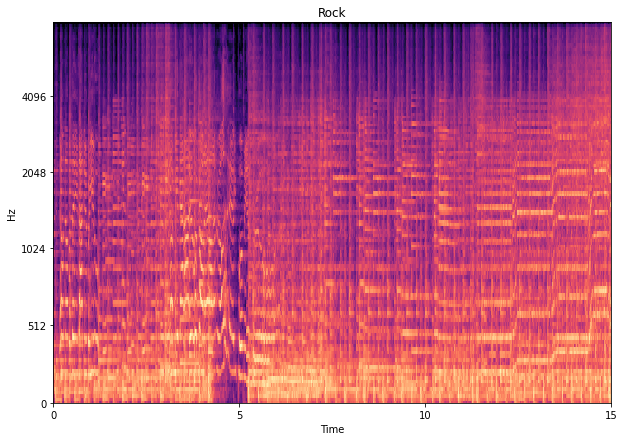

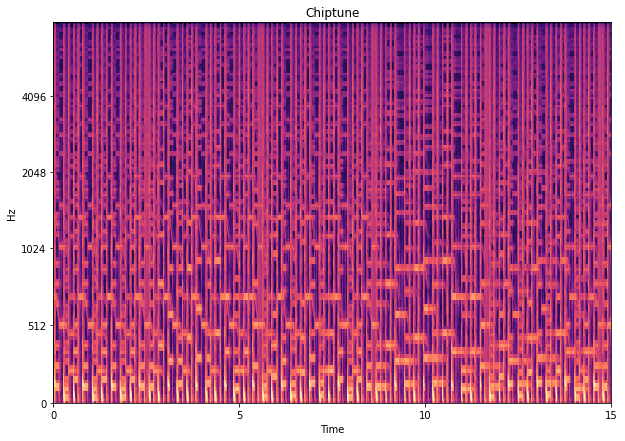

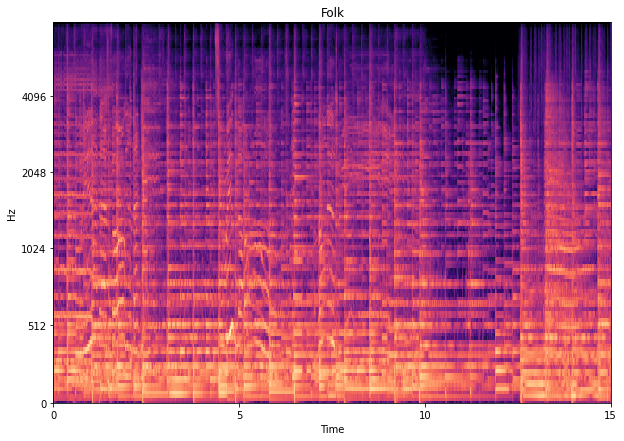

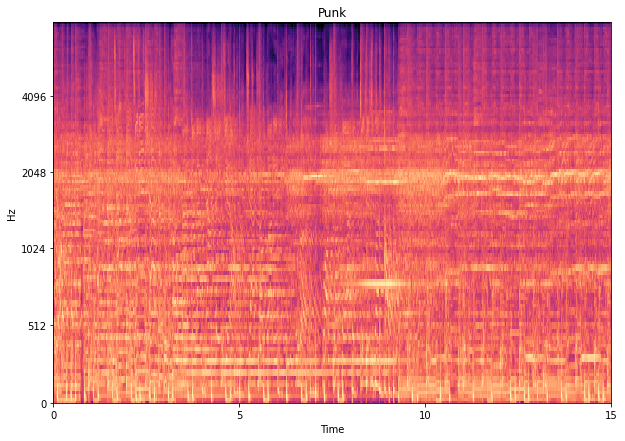

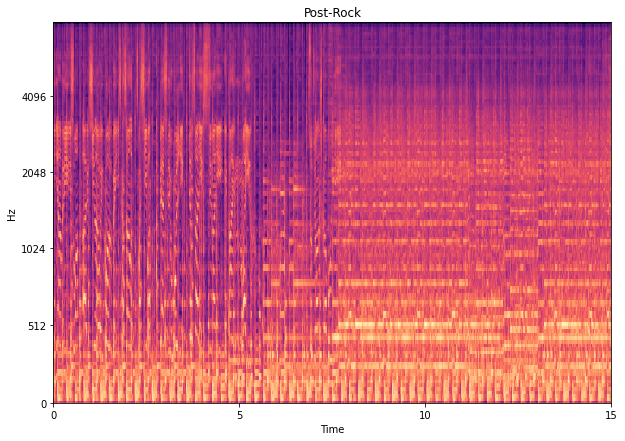

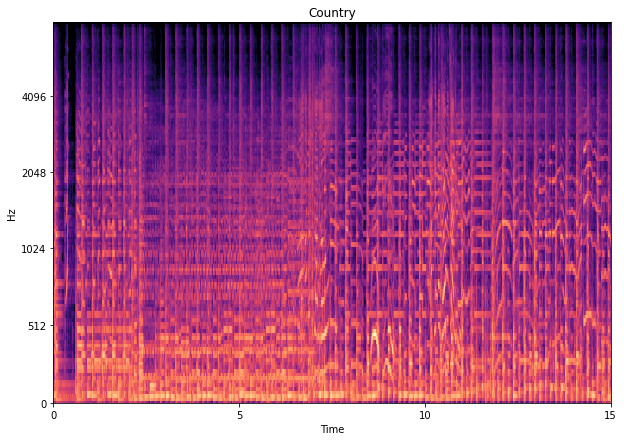

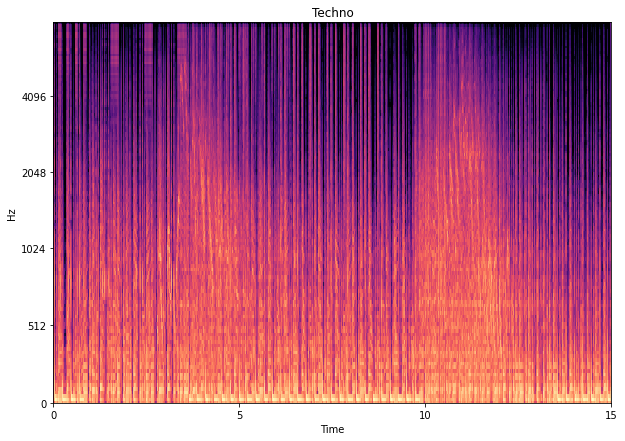

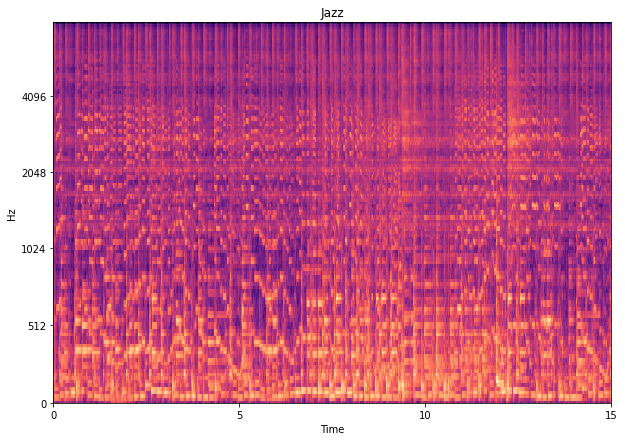

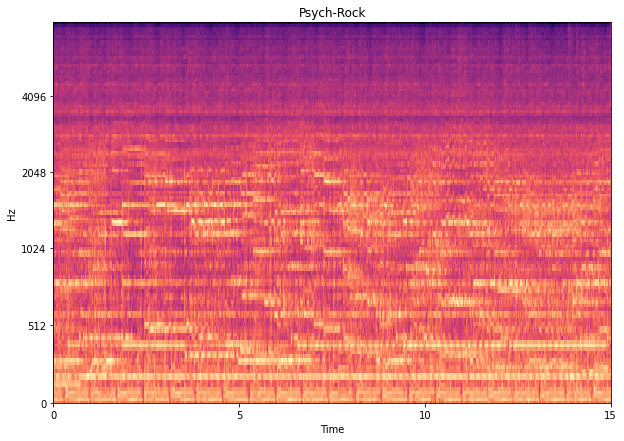

In [12]:
genres = ['Ambient Electronic','Chiptune','Classical','Country','Electronic','Folk','Hip-Hop','Indie-Rock','Jazz','Metal','Pop','Post-Rock','Psych-Rock','Punk','Reggae','Rock','Techno','Trip-Hop']

# Plotting spectrogram for each genre
for file in os.scandir(wav_path):
    if file.is_dir():
        plot_spectrogram(os.path.join(wav_path, file.name), file.name)